In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sbn 

import statsmodels.api as sm
from patsy import dmatrices

import os 

In [2]:
batch_res = pd.read_csv('./output/batch_effect_results.csv')
batch_res.head()

,batch,pc1_coef,pc1_pval,pc2_coef,pc2_pval,run_id
0,H210514_SET1,0.074145,0.685760,0.089891,0.072578,5e4cc8da-8403-4e5e-802c-7f7618c7aec6
1,H210514_SET2,0.057002,0.755655,0.022954,0.640578,5e4cc8da-8403-4e5e-802c-7f7618c7aec6
2,H210521_SET1,-0.019835,0.913723,0.046961,0.341469,5e4cc8da-8403-4e5e-802c-7f7618c7aec6
3,H210521_SET2,0.016742,0.927135,-0.008183,0.867651,5e4cc8da-8403-4e5e-802c-7f7618c7aec6
4,H210528_SET1,0.031648,0.862773,0.019225,0.695646,5e4cc8da-8403-4e5e-802c-7f7618c7aec6


In [3]:
run_res = pd.read_csv('./output/experiment_run_results.csv')
run_res.head()

,accuracy(train),pc1_var,pc2_var,kmeans_inertia,res_line,sens_line,drug,nclus,resample_sz,load,burnin,batch_corrected,run_id,cell_line,drug_check
0,0.857143,0.616078,0.225881,1.723826,T798I,WT,neratinib,5,50,normalized,8,False,5e4cc8da-8403-4e5e-802c-7f7618c7aec6,EFM192A,NERATINIB
1,0.892857,0.613683,0.228963,1.723758,T798I,WT,neratinib,5,50,normalized,8,True,0c6e8348-1971-46f0-90e9-cad7c0f9cb82,EFM192A,NERATINIB
2,0.785714,0.608245,0.228656,5.223755,T798I,WT,neratinib,5,150,raw,8,False,80051c66-14fd-431e-98bc-7e62470465f6,EFM192A,NERATINIB
3,0.928571,0.376511,0.158135,2.562922,T798I,WT,neratinib,25,100,raw,0,True,bfcbe14d-078d-4ef0-a2fa-c7b0e2160dea,EFM192A,NERATINIB
4,0.857143,0.443781,0.175361,4.027941,T798I,WT,neratinib,15,150,raw,8,False,f10b6272-4a08-408f-97d1-948765cda77f,EFM192A,NERATINIB


In [4]:
mut_res = pd.read_csv('./output/mutant_resistance_results.csv')
mut_res.tail()

,pc1,pc2,treatment,mutant,batch,cell_count,prob_res,prob_sens,call,run_id,cell_line,drug_check,pc1_coef,pc1_pval,pc2_coef,pc2_pval,pc1_uncor,pc2_uncor
37435,0.453640,0.246403,trastuzumab,I886M,H210514_SET1,259,0.184113,0.815887,sens,4b759936-d52f-4c36-bbb5-e9c1044e4aec,EFM192A,TRASTUZUMAB,-0.134509,0.23328,0.019722,0.770946,0.319131,0.266126
37436,0.277555,-0.039328,trastuzumab,L43V,H210514_SET1,200,0.061220,0.938780,sens,4b759936-d52f-4c36-bbb5-e9c1044e4aec,EFM192A,TRASTUZUMAB,-0.134509,0.23328,0.019722,0.770946,0.143046,-0.019606
37437,-0.306509,0.123580,trastuzumab,ND611,H210514_SET1,176,0.955531,0.044469,res,4b759936-d52f-4c36-bbb5-e9c1044e4aec,EFM192A,TRASTUZUMAB,-0.134509,0.23328,0.019722,0.770946,-0.441018,0.143302
37438,0.265602,0.044967,trastuzumab,T798I,H210514_SET1,285,0.036282,0.963718,sens,4b759936-d52f-4c36-bbb5-e9c1044e4aec,EFM192A,TRASTUZUMAB,-0.134509,0.23328,0.019722,0.770946,0.131093,0.064689
37439,0.226268,-0.022936,trastuzumab,WT,H210514_SET1,247,0.038202,0.961798,sens,4b759936-d52f-4c36-bbb5-e9c1044e4aec,EFM192A,TRASTUZUMAB,-0.134509,0.23328,0.019722,0.770946,0.091759,-0.003213


In [37]:
#df1 = mut_res[lambda x: (x.cell_line == 'SKBR3') & (x.mutant == 'I886M') & (x.treatment == 'neratinib')]
#df1.head()
#plt.hist(df1.prob_res)
#plt.xlabel('prob_res')
#plt.xlim(0,1)

In [5]:
for c in run_res.columns: 
    print(f'> **{c}**: ')
    print()

> **accuracy(train)**: 

> **pc1_var**: 

> **pc2_var**: 

> **kmeans_inertia**: 

> **res_line**: 

> **sens_line**: 

> **drug**: 

> **nclus**: 

> **resample_sz**: 

> **load**: 

> **burnin**: 

> **batch_corrected**: 

> **run_id**: 

> **cell_line**: 

> **drug_check**: 



# Train accuracy 

This is a good metric of how easily sepearable the classes are.

In [12]:
y, X = dmatrices('accuracy ~ nclus + resample_sz + load + burnin', data=run_res.rename({'accuracy(train)':'accuracy'}, axis=1), return_type='dataframe')
mod = sm.OLS(y, X) 
fit = mod.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:               accuracy   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9895
Date:                Fri, 08 Apr 2022   Prob (F-statistic):              0.414
Time:                        10:16:21   Log-Likelihood:                 426.83
No. Observations:                 288   AIC:                            -843.7
Df Residuals:                     283   BIC:                            -825.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.9364      0.011     81.466      

# Batch Effects 

In [40]:
batch_res2 = batch_res.assign(PC1_flag = lambda x: x.pc1_pval < 0.05,
                               PC2_flag = lambda x: x.pc2_pval < 0.05)

batch_res2 = batch_res2.assign(any_flag=lambda x: (x.PC1_flag | x.PC2_flag))

x = mut_res[['cell_line', 'treatment', 'run_id']].drop_duplicates()

batch_res2 = batch_res2.merge(x, on='run_id', how='left')

batch_sum = batch_res2[['batch', 'treatment', 'PC1_flag', "PC2_flag", 'any_flag']].groupby(['batch', 'treatment']).mean().reset_index()
batch_sum.head()

,batch,treatment,PC1_flag,PC2_flag,any_flag
0,H210205_SET1_2,neratinib,0.0,0.0,0.0
1,H210205_SET1_2,trastuzumab,0.0,0.0,0.0
2,H210205_SET2_2,neratinib,0.0,0.0,0.0
3,H210205_SET2_2,trastuzumab,0.0,0.0,0.0
4,H210212_SET1,neratinib,0.0,0.0,0.0


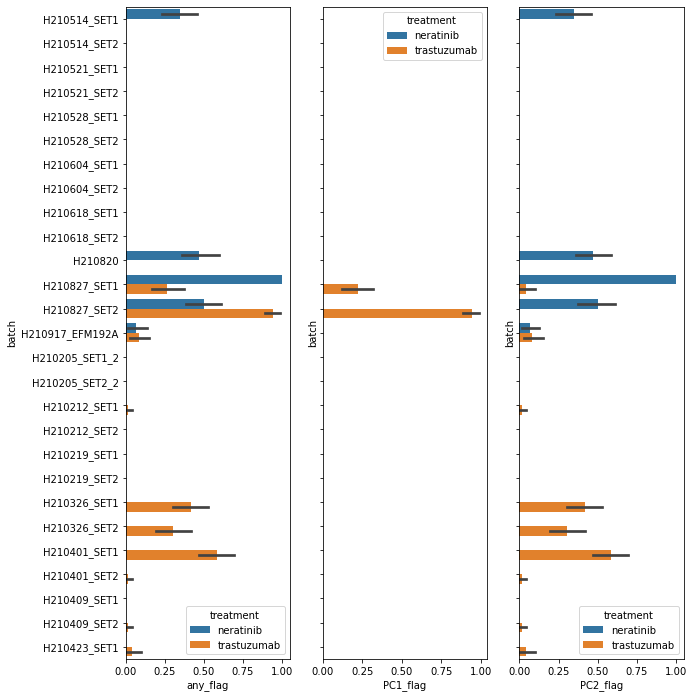

In [41]:
f, axes = plt.subplots(1,3, figsize=(10,12), sharey=True)
sbn.barplot(y='batch', x='any_flag', hue='treatment', data=batch_res2, ax=axes[0])
sbn.barplot(y='batch', x='PC1_flag', hue='treatment', data=batch_res2, ax=axes[1])
sbn.barplot(y='batch', x='PC2_flag', hue='treatment', data=batch_res2, ax=axes[2])
plt.show()

In [16]:
myres = mut_res.merge(run_res, on='run_id', how='left')
myres.head()

,pc1,pc2,treatment,mutant,batch,cell_count,prob_res,prob_sens,call,run_id,...,res_line,sens_line,drug,nclus,resample_sz,load,burnin,batch_corrected,cell_line_y,drug_check_y
0,0.546133,0.094302,neratinib,A1160V,H210820,207,0.058485,0.941515,sens,5e4cc8da-8403-4e5e-802c-7f7618c7aec6,...,T798I,WT,neratinib,5,50,normalized,8,False,EFM192A,NERATINIB
1,0.453821,0.132692,neratinib,A355QFS76,H210827_SET2,68,0.066501,0.933499,sens,5e4cc8da-8403-4e5e-802c-7f7618c7aec6,...,T798I,WT,neratinib,5,50,normalized,8,False,EFM192A,NERATINIB
2,-0.101564,-0.304567,neratinib,A37T,H210827_SET1,284,0.500000,0.500000,res,5e4cc8da-8403-4e5e-802c-7f7618c7aec6,...,T798I,WT,neratinib,5,50,normalized,8,False,EFM192A,NERATINIB
3,-0.072254,-0.314830,neratinib,D639E,H210827_SET2,273,0.517414,0.482586,res,5e4cc8da-8403-4e5e-802c-7f7618c7aec6,...,T798I,WT,neratinib,5,50,normalized,8,False,EFM192A,NERATINIB
4,0.173008,-0.225269,neratinib,G778P780DUP,H210820,28,0.806100,0.193900,res,5e4cc8da-8403-4e5e-802c-7f7618c7aec6,...,T798I,WT,neratinib,5,50,normalized,8,False,EFM192A,NERATINIB


# Final Results

In [44]:
# 5th Percentile
def q05(x):
    return x.quantile(0.05)

# 95th Percentile
def q95(x):
    return x.quantile(0.95)

In [56]:
# to include batch res
batch_agg = batch_res2[['batch', 'cell_line', 'treatment', 'any_flag']].groupby(['batch','cell_line', 'treatment']).mean().reset_index()

# TODO: Decide, do we want to aggregate across batch, or keep separate? 
# aggregate across batch: 
# df = mut_res.groupby(['cell_line', 'treatment', 'mutant', 'batch'])['prob_res'].agg(['mean', 'std', q05, q95, 'min', 'max']).sort_values('mean', ascending=False)
# break out by batch: 
# df = mut_res.groupby(['cell_line', 'treatment', 'mutant'])['prob_res'].agg(['mean', 'std', q05, q95, 'min', 'max']).sort_values('mean', ascending=False)

df = mut_res.groupby(['cell_line', 'treatment', 'mutant', 'batch'])['prob_res'].agg(['mean', 'std', q05, q95, 'min', 'max']).sort_values('mean', ascending=False).reset_index()

df = df.merge(batch_agg, on=['batch', 'cell_line', 'treatment'])

# df = df.set_index(['cell_line', 'treatment', 'mutant', 'batch'])
df.head()

,cell_line,treatment,mutant,batch,mean,std,q05,q95,min,max,any_flag
0,EFM192A,trastuzumab,ND611,H210618_SET2,0.960678,0.008586,0.946010,0.974646,0.943409,0.981635,0.0
1,EFM192A,trastuzumab,V777L,H210618_SET2,0.956983,0.010479,0.939916,0.970814,0.917649,0.980422,0.0
2,EFM192A,trastuzumab,D769H,H210618_SET2,0.933373,0.029546,0.864887,0.965536,0.841735,0.979117,0.0
3,EFM192A,trastuzumab,G778S779INSLPG,H210618_SET2,0.922779,0.051840,0.856809,0.961881,0.638037,0.967155,0.0
4,EFM192A,trastuzumab,T862A,H210618_SET2,0.906621,0.084042,0.779723,0.965356,0.386337,0.976509,0.0


In [58]:
df[lambda x: (x.cell_line == 'EFM192A') & (x.treatment == 'neratinib')].sort_values('mean', ascending=False)

,cell_line,treatment,mutant,batch,mean,std,q05,q95,min,max,any_flag
376,EFM192A,neratinib,T798I,H210521_SET1,0.867004,0.070702,0.763577,0.961965,0.746197,0.966757,0.000000
386,EFM192A,neratinib,T798I,H210820,0.852136,0.044387,0.776126,0.911161,0.750059,0.922721,0.472222
393,EFM192A,neratinib,T798I,H210528_SET1,0.850484,0.058408,0.752522,0.925144,0.725799,0.959700,0.000000
377,EFM192A,neratinib,G778S779INSLPS,H210521_SET1,0.845215,0.089272,0.702467,0.948614,0.691284,0.964663,0.000000
402,EFM192A,neratinib,T798I,H210528_SET2,0.843950,0.056797,0.752706,0.929202,0.715418,0.945464,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
468,EFM192A,neratinib,WT,H210514_SET2,0.057188,0.036003,0.022545,0.131574,0.013690,0.169491,0.000000
469,EFM192A,neratinib,R340G,H210514_SET2,0.057061,0.032794,0.026049,0.122779,0.019366,0.162695,0.000000
449,EFM192A,neratinib,ND611,H210604_SET1,0.055183,0.038338,0.019310,0.130707,0.011903,0.174740,0.000000
489,EFM192A,neratinib,T297I,H210521_SET2,0.053836,0.033940,0.022015,0.118922,0.012237,0.162825,0.000000


In [28]:
df.loc[('SKBR3', 'neratinib', 'D769Y')]

/tmp/ipykernel_12619/2498235424.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[('SKBR3', 'neratinib', 'D769Y')]


,mean,std,q05,q95,min,max
batch,,,,,,
H210212_SET1,0.393026,0.287144,0.073432,0.927922,0.061374,0.964374


In [29]:
# searching for variants that behave very differently from sensitive and resistant classes - 
df.loc[('SKBR3', 'neratinib')][lambda x: ((x.q05 > 0.25) & (x.q95 < 0.75))]

/tmp/ipykernel_12619/2549436932.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[('SKBR3', 'neratinib')][lambda x: ((x.q05 > 0.25) & (x.q95 < 0.75))]


,,mean,std,q05,q95,min,max
mutant,batch,,,,,,
L755S,H210409_SET2,0.498274,0.150662,0.253474,0.745350,0.186515,0.819809
L755T759DEL,H210205_SET1_2,0.484334,0.051990,0.416772,0.575872,0.393642,0.590631


In [30]:
# searching for variants that behave very differently from sensitive and resistant classes - 
df.loc[('EFM192A', 'neratinib')][lambda x: ((x.q05 > 0.25) & (x.q95 < 0.75))]

/tmp/ipykernel_12619/3934371417.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[('EFM192A', 'neratinib')][lambda x: ((x.q05 > 0.25) & (x.q95 < 0.75))]


,,mean,std,q05,q95,min,max
mutant,batch,,,,,,
A1039T,H210604_SET1,0.611908,0.094316,0.451515,0.746935,0.392085,0.768773
L1197F,H210618_SET1,0.538047,0.071279,0.428060,0.637116,0.325487,0.698376
D769Y,H210514_SET1,0.526508,0.115829,0.331781,0.687370,0.257997,0.706213
P232S,H210521_SET2,0.520908,0.112630,0.314356,0.655425,0.220330,0.760061
T733I,H210917_EFM192A,0.494076,0.108077,0.357917,0.698080,0.320030,0.722700
L869R,H210820,0.445043,0.063412,0.333615,0.533732,0.270735,0.558009
L755T759DEL,H210827_SET2,0.433566,0.114353,0.282976,0.617076,0.216611,0.644710
V697L,H210528_SET1,0.417960,0.106788,0.275269,0.605167,0.185922,0.640497
Y772A775DUP,H210604_SET1,0.388364,0.053354,0.296379,0.474940,0.245191,0.488710


In [26]:
df.loc[('SKBR3', 'neratinib')][lambda x: x['mean'] > 0.5]

/tmp/ipykernel_5841/359209146.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[('SKBR3', 'neratinib')][lambda x: x['mean'] > 0.5]


,mean,std,q05,q95,min,max
mutant,,,,,,
L785F,0.942989,0.011998,0.925626,0.958235,0.894749,0.963502
T798I,0.935225,0.025569,0.906665,0.957353,0.514548,0.971503
G778S779INSLPS,0.820796,0.155991,0.500506,0.942222,0.353049,0.956937
V797A,0.806372,0.070023,0.688799,0.916027,0.653215,0.933701
Y722V773INSRDGE,0.732694,0.150470,0.460161,0.906359,0.362407,0.947731
F976L,0.649346,0.134941,0.420902,0.874484,0.345451,0.914733
R929W,0.644151,0.196943,0.272044,0.858079,0.234576,0.883865
R456C,0.545610,0.226602,0.189840,0.837504,0.150069,0.878015


In [27]:
df.loc[('EFM192A', 'trastuzumab')][lambda x: x['mean'] > 0.5]

/tmp/ipykernel_5841/377190337.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[('EFM192A', 'trastuzumab')][lambda x: x['mean'] > 0.5]


,mean,std,q05,q95,min,max
mutant,,,,,,
S609C,0.957095,0.011197,0.940865,0.973398,0.917365,0.980711
V777L,0.956983,0.010479,0.939916,0.970814,0.917649,0.980422
L755S,0.934448,0.028772,0.882662,0.964108,0.827600,0.975534
D769H,0.933373,0.029546,0.864887,0.965536,0.841735,0.979117
G778S779INSLPG,0.922779,0.051840,0.856809,0.961881,0.638037,0.967155
L869R,0.909840,0.028243,0.861879,0.946447,0.823156,0.955756
Y772A775DUP,0.907673,0.066462,0.759457,0.963974,0.734420,0.970901
T862A,0.906621,0.084042,0.779723,0.965356,0.386337,0.976509
L755T759DEL,0.896240,0.037929,0.838313,0.951771,0.782118,0.968668


In [28]:
df.loc[('SKBR3', 'trastuzumab')][lambda x: x['mean'] > 0.5]

/tmp/ipykernel_5841/1948531870.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[('SKBR3', 'trastuzumab')][lambda x: x['mean'] > 0.5]


,mean,std,q05,q95,min,max
mutant,,,,,,
I767M,0.944183,0.033284,0.877749,0.981975,0.841106,0.992817
T733I,0.940878,0.024239,0.897919,0.977372,0.873731,0.986092
D873G,0.936026,0.034767,0.881231,0.980434,0.769492,0.986409
D769N,0.930325,0.028589,0.880588,0.971472,0.826444,0.983550
R897G,0.929368,0.039009,0.857157,0.978415,0.828286,0.985699
T862A,0.924533,0.031227,0.868436,0.969861,0.812531,0.982607
T862S,0.913184,0.038491,0.844026,0.965295,0.795633,0.980045
R456C,0.910019,0.041213,0.823709,0.958119,0.793923,0.985123
V842I,0.906965,0.073577,0.737281,0.970769,0.588623,0.982950


In [31]:
# sort values based on quantile 
df.loc[('SKBR3', 'trastuzumab')][lambda x: x['q05'] > 0.75]

/tmp/ipykernel_12619/3808231983.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[('SKBR3', 'trastuzumab')][lambda x: x['q05'] > 0.75]


mean       std       q05       q95       min  \
mutant      batch                                                              
ND611       H210212_SET2    0.953753  0.024033  0.905462  0.980579  0.886170   
            H210326_SET1    0.950978  0.027340  0.894510  0.982021  0.855053   
I767M       H210205_SET1_2  0.944183  0.033284  0.877749  0.981975  0.841106   
ND611       H210219_SET2    0.942478  0.028654  0.890075  0.979064  0.865670   
            H210423_SET1    0.940981  0.035479  0.876002  0.979336  0.834825   
T733I       H210205_SET1_2  0.940878  0.024239  0.897919  0.977372  0.873731   
D873G       H210219_SET2    0.936026  0.034767  0.881231  0.980434  0.769492   
V842I       H210205_SET2_2  0.935187  0.029938  0.878542  0.973076  0.821826   
D769N       H210401_SET2    0.930325  0.028589  0.880588  0.971472  0.826444   
R897G       H210401_SET2    0.929368  0.039009  0.857157  0.978415  0.828286   
ND611       H210401_SET2    0.927613  0.026606  0.881156  0.965985  0.834819   
T862A       H210423_SET1    0.924533  0.031227  0.868436  0.969861  0.812531   
ND611       H210212_SET1    0.924356  0.027123  0.878955  0.965696  0.834835   
            H210219_SET1    0.924187  0.026149  0.879298  0.959581  0.834819   
            H210401_SET1    0.917267  0.037880  0.848983  0.969200  0.795766   
T862S       H210409_SET1    0.913184  0.038491  0.844026  0.965295  0.795633   
R456C       H210212_SET2    0.910019  0.041213  0.823709  0.958119  0.793923   
A1039T      H210326_SET2    0.902333  0.060475  0.805290  0.965596  0.694093   
T798I       H210423_SET1    0.893825  0.051108  0.818658  0.967097  0.723138   
S305C       H210326_SET1    0.891668  0.053019  0.789166  0.958302  0.762941   
L755S       H210409_SET2    0.883057  0.059978  0.772873  0.952110  0.671280   
T798I       H210212_SET1    0.863946  0.042908  0.791452  0.922816  0.737788   
L755T759DEL H210205_SET1_2  0.859392  0.044646  0.786487  0.934685  0.732583   

                                 max  
mutant      batch                     
ND611       H210212_SET2    0.992921  
            H210326_SET1    0.993065  
I767M       H210205_SET1_2  0.992817  
ND611       H210219_SET2    0.979613  
            H210423_SET1    0.985269  
T733I       H210205_SET1_2  0.986092  
D873G       H210219_SET2    0.986409  
V842I       H210205_SET2_2  0.982950  
D769N       H210401_SET2    0.983550  
R897G       H210401_SET2    0.985699  
ND611       H210401_SET2    0.974819  
T862A       H210423_SET1    0.982607  
ND611       H210212_SET1    0.982124  
            H210219_SET1    0.969114  
            H210401_SET1    0.976122  
T862S       H210409_SET1    0.980045  
R456C       H210212_SET2    0.985123  
A1039T      H210326_SET2    0.980979  
T798I       H210423_SET1    0.981008  
S305C       H210326_SET1    0.979282  
L755S       H210409_SET2    0.967719  
T798I       H210212_SET1    0.939663  
L755T759DEL H210205_SET1_2  0.968349

In [64]:
mut_res2 = mut_res.merge(batch_sum, on=['batch', 'treatment'], how='left')
mut_res2.head()

,pc1,pc2,treatment,mutant,batch,pc1_coef,pc1_pval,pc2_coef,pc2_pval,run_id,pc1_uncor,pc2_uncor,prob_res,prob_sens,call,cell_line,drug_check,PC1_flag,PC2_flag,any_flag
0,0.531720,0.265560,neratinib,A1160V,H210820,-0.001453,0.993542,-0.130896,0.025425,b5f1b872-e62d-4aec-8fee-53ed3f760116,0.530267,0.134664,0.103657,0.896343,sens,EFM192A,NERATINIB,0.0,0.319444,0.319444
1,0.056703,-0.189783,neratinib,G778P780DUP,H210820,-0.001453,0.993542,-0.130896,0.025425,b5f1b872-e62d-4aec-8fee-53ed3f760116,0.055250,-0.320679,0.849838,0.150162,res,EFM192A,NERATINIB,0.0,0.319444,0.319444
2,0.357022,0.009388,neratinib,L785F,H210820,-0.001453,0.993542,-0.130896,0.025425,b5f1b872-e62d-4aec-8fee-53ed3f760116,0.355570,-0.121507,0.200574,0.799426,sens,EFM192A,NERATINIB,0.0,0.319444,0.319444
3,-0.225782,-0.008562,neratinib,L869R,H210820,-0.001453,0.993542,-0.130896,0.025425,b5f1b872-e62d-4aec-8fee-53ed3f760116,-0.227235,-0.139458,0.506760,0.493240,res,EFM192A,NERATINIB,0.0,0.319444,0.319444
4,-0.058056,0.245986,neratinib,ND611,H210820,-0.001453,0.993542,-0.130896,0.025425,b5f1b872-e62d-4aec-8fee-53ed3f760116,-0.059508,0.115090,0.423131,0.576869,sens,EFM192A,NERATINIB,0.0,0.319444,0.319444


In [9]:
mut_res2['']

(37440, 14)

In [13]:
mut_res2[lambda x: x.PC1_flag.isna()].batch.unique()

array(['H210514_SET1', 'H210205_SET1_2'], dtype=object)

In [14]:
mut_res.groupby('batch')['mutant'].count()

batch
H210205_SET1_2     20
H210205_SET2_2     20
H210212_SET1       18
H210212_SET2       20
H210219_SET1       18
H210219_SET2       20
H210326_SET1       20
H210326_SET2       20
H210401_SET1       18
H210401_SET2       18
H210409_SET1       20
H210409_SET2       20
H210423_SET1       20
H210514_SET1       20
H210514_SET2       20
H210521_SET1       20
H210521_SET2       20
H210528_SET1       18
H210528_SET2       16
H210604_SET1       20
H210604_SET2       20
H210618_SET1       20
H210618_SET2       20
H210820            14
H210827_SET1       20
H210827_SET2       20
H210917_EFM192A    20
Name: mutant, dtype: int64

In [110]:
mut_res.shape

(520, 11)

In [111]:
mut_res2.shape

(520, 14)

In [29]:
norm = lambda x, y: (x-min(y))/ (max(y) - min(y)) 

nclus_ = {row.run_id:[0., 1- norm(row.nclus,run_res.nclus),0., 0.5] for i,row in run_res.iterrows()}
nclus_colors = run_res['run_id'].map(nclus_).rename('nclus')

load_ = {row.run_id:'k' if (row.load == 'normalized') else 'w' for i,row in run_res.iterrows()}
load_colors = run_res['run_id'].map(load_).rename('load')

resamp_ = {row.run_id:[1 - norm(row.resample_sz,run_res.resample_sz), 0., 0., 0.5] for i,row in run_res.iterrows()}
resamp_colors = run_res['run_id'].map(resamp_).rename('resample_sz')

row_colors = pd.concat([nclus_colors, load_colors, resamp_colors], axis=1)
row_colors = row_colors.set_index(run_res.run_id)

#print(row_colors)

#ids_tokeep = run_res[lambda x: (x.nclus < 35)].run_id.values
#prob_res2 = prob_res[lambda x: x.run_id.isin(ids_tokeep)]

prob_res2 = mut_res.merge(run_res, on='run_id').pivot(columns='run_id', index='obs_id', values='prob_res')
res_mat = prob_res2.corr().fillna(0)
sbn.clustermap(res_mat, vmin=-1, vmax=1, center=0, row_colors=row_colors, figsize=(10,10))

KeyError: 'obs_id'

# concordant calls

In [30]:
conc_calls = prob_res.groupby(['obs_id', 'call']).count()[['run_id']].reset_index().set_index('obs_id').pivot(columns='call', values='run_id').assign(prop_call_res=lambda x: x.res / (x.res + x.sens))

NameError: name 'prob_res' is not defined

In [31]:
plt.figure()
plt.hist(conc_calls.prop_call_res)
plt.xlabel('proportion of concordant resistant calls')
plt.show()

NameError: name 'conc_calls' is not defined

<Figure size 432x288 with 0 Axes>

In [17]:
np.sum( conc_calls.prop_call_res > 0.75 )

12

In [18]:
conc_res_obs_ids = conc_calls[conc_calls.prop_call_res > 0.75].reset_index().obs_id

In [19]:
prob_res[lambda x: x.obs_id.isin(conc_res_obs_ids)].cell_line.unique()

array(['G778S779insLPS', 'L755T759DEL', 'R456C', 'R678Q', 'T798I',
       'V842I', 'Y835F'], dtype=object)

# Model variance 

Same config params, same results? 

In [59]:
def get_model_variance_stats(nclus, load, sz): 
    
    _ids = run_res[lambda x: (x.nclus==nclus) & (x.load == load) & (x.resample_sz == sz)].run_id
    mvar_ = prob_res[lambda x: x.run_id.isin(_ids)]
    mvar_res = mvar_[['run_id', 'obs_id', 'prob_res']].pivot(columns='run_id', values='prob_res', index='obs_id')
    mvar_mat = mvar_res.corr()

    triu_idx = np.triu_indices(mvar_mat.shape[0], k=1)
    corrs = mvar_mat.values[triu_idx]
    corr_mean = corrs.mean()
    corr_std = corrs.std()
    corr_min = corrs.min()
    corr_max = corrs.max()
    return corr_mean, corr_std, corr_min, corr_max

var_res = {'nclus':[], 'load':[], 'resample_sz':[], 'corr_mean':[], 'corr_std':[], 'corr_min':[], 'corr_max':[]}
for nc in run_res.nclus.unique(): 
    for l in run_res.load.unique(): 
        for sz in run_res.resample_sz.unique(): 
            corr_mean, corr_std, corr_min, corr_max = get_model_variance_stats(nc, l, sz)
            var_res['nclus'].append(nc)
            var_res['load'].append(l)
            var_res['resample_sz'].append(sz)
            var_res['corr_mean'].append(corr_mean)
            var_res['corr_std'].append(corr_std)
            var_res['corr_min'].append(corr_min)
            var_res['corr_max'].append(corr_max)
            
var_res = pd.DataFrame(var_res).assign(corr_min_unit = lambda x: x.corr_min.clip(0,1))
var_res.head()

,nclus,load,resample_sz,corr_mean,corr_std,corr_min,corr_max,corr_min_unit
0,15,raw,75,0.935192,0.020712,0.905259,0.972514,0.905259
1,15,raw,150,0.938284,0.016595,0.902949,0.969040,0.902949
2,15,raw,125,0.949348,0.019311,0.919606,0.982665,0.919606
3,15,raw,50,0.908513,0.033114,0.834107,0.959517,0.834107
4,15,raw,100,0.938958,0.017862,0.906228,0.966396,0.906228


In [60]:
lm = logit('corr_min_unit ~ nclus + resample_sz + load', data=var_res).fit() #Specify C for Categorical
print(lm.params)
print()
print(lm.conf_int())
#print()
#print(sm.stats.anova_lm(lm))

Optimization terminated successfully.
         Current function value: 0.197250
         Iterations 7
Intercept      4.222236
load[T.raw]   -0.420407
nclus         -0.162454
resample_sz    0.002738
dtype: float64

                    0         1
Intercept    1.429946  7.014527
load[T.raw] -1.919332  1.078518
nclus       -0.229108 -0.095800
resample_sz -0.018269  0.023746


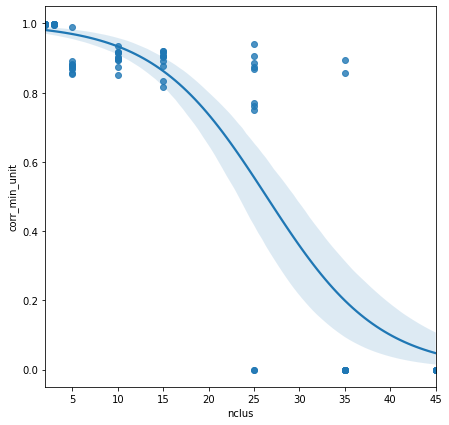

In [61]:
plt.figure(figsize=(7,7))
sbn.regplot(x='nclus', y='corr_min_unit', data=var_res, logistic=True)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

No handles with labels found to put in legend.


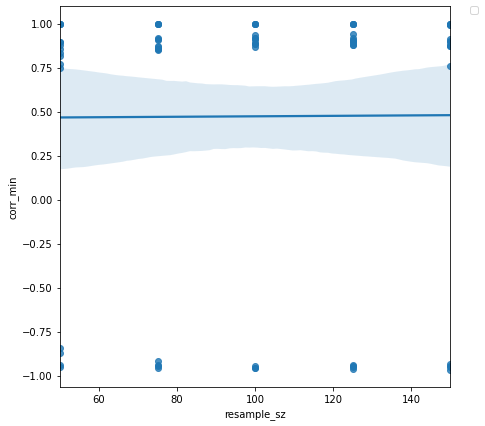

In [54]:
plt.figure(figsize=(7,7))
sbn.regplot(x='resample_sz', y='corr_min', data=var_res, logistic=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

No handles with labels found to put in legend.


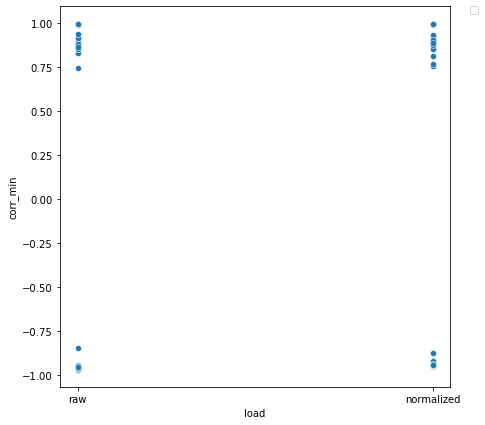

In [41]:
plt.figure(figsize=(7,7))
sbn.scatterplot(x='load', y='corr_min', data=var_res)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Stable Configs


In [71]:
var_res.head()

,nclus,load,resample_sz,corr_mean,corr_std,corr_min,corr_max,corr_min_unit
0,15,raw,75,0.935192,0.020712,0.905259,0.972514,0.905259
1,15,raw,150,0.938284,0.016595,0.902949,0.969040,0.902949
2,15,raw,125,0.949348,0.019311,0.919606,0.982665,0.919606
3,15,raw,50,0.908513,0.033114,0.834107,0.959517,0.834107
4,15,raw,100,0.938958,0.017862,0.906228,0.966396,0.906228


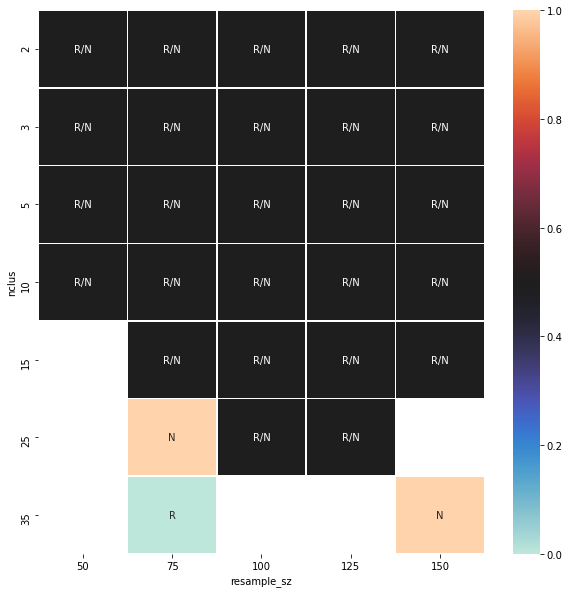

In [113]:
var_res2 = var_res[lambda x: x.corr_min > 0.85][['resample_sz', 'nclus', 'load']].groupby(['resample_sz', 'nclus']).agg('-'.join).reset_index()
var_mat = var_res2.assign(load= [0 if x=='raw' else (1 if x=='normalized' else 0.5) for x in var_res2.load])
labels = var_res2.assign(load= ['R' if x=='raw' else ('N' if x=='normalized' else 'R/N') for x in var_res2.load]).pivot(columns='resample_sz', index='nclus', values='load')
var_mat = var_mat.pivot(columns='resample_sz', index='nclus', values='load')

plt.figure(figsize=(10,10))
sbn.heatmap(var_mat, linewidths=.5, annot=labels.values, fmt='', vmin=0, vmax=1, center=0.5)
plt.show()

In [139]:
acc_mat

load
resample_sz nclus      
50          2       1.0
            3       1.0
            10      1.0
75          2       1.0
            3       0.5
            10      1.0
            15      1.0
100         2       1.0
            3       1.0
            10      1.0
125         2       1.0
            3       0.5
            10      1.0
            15      1.0
150         2       1.0
            3       0.5
            10      1.0
            15      1.0

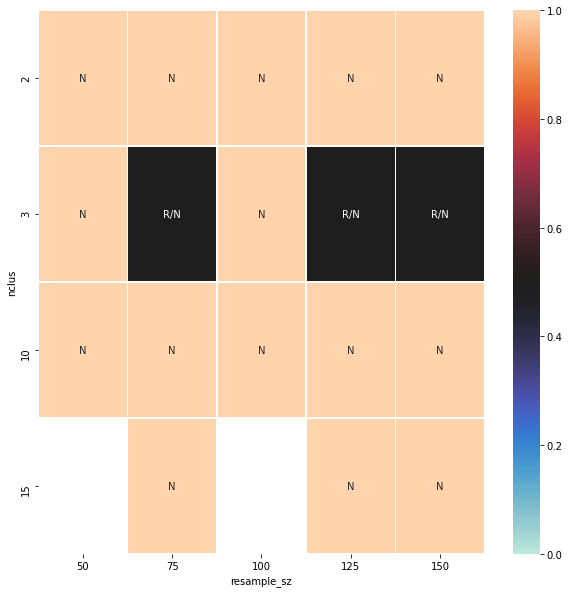

In [142]:
hi_ac = run_res.groupby(['nclus', 'resample_sz', 'load']).agg('mean')[['accuracy(train)']][lambda x: x['accuracy(train)'] == 1.]

hi_ac = hi_ac.reset_index()[['nclus', 'resample_sz', 'load']].groupby(['resample_sz', 'nclus']).agg('-'.join).reset_index()

acc_mat = hi_ac.assign(load= [0 if x=='raw' else (1 if x=='normalized' else 0.5) for x in hi_ac.load]).pivot(columns='resample_sz', index='nclus', values='load')
labels = hi_ac.assign(load= ['R' if x=='raw' else ('N' if x=='normalized' else 'R/N') for x in hi_ac.load]).pivot(columns='resample_sz', index='nclus', values='load')

plt.figure(figsize=(10,10))
sbn.heatmap(acc_mat, linewidths=.5, annot=labels.values, fmt='', vmin=0, vmax=1, center=0.5)
plt.show()

In [121]:


plt.figure(figsize=(10,10))
sbn.heatmap(var_mat, linewidths=.5, annot=labels.values, fmt='', vmin=0, vmax=1, center=0.5)
plt.show()

accuracy(train)
nclus resample_sz load                       
2     50          normalized              1.0
      75          normalized              1.0
      100         normalized              1.0
      125         normalized              1.0
      150         normalized              1.0
3     50          normalized              1.0
      75          normalized              1.0
                  raw                     1.0
      100         normalized              1.0
      125         normalized              1.0
                  raw                     1.0
      150         normalized              1.0
                  raw                     1.0
10    50          normalized              1.0
      75          normalized              1.0
      100         normalized              1.0
      125         normalized              1.0
      150         normalized              1.0
15    75          normalized              1.0
      125         normalized              1.0
      150         normalized              1.0